Python case study case 3: Effects of Video Games on Aggression \
Data set resources [here](https://www.kaggle.com/datasets/muhammadshamoeel/effects-of-video-games-on-aggression-msdos-csv/data)
\
\
\
Let's observe and understand better the dataset first

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

df = pd.read_csv('C:\\Users\\vielu\\OneDrive\\Documents\\Data Analysis\\Python Study\\Effects of Violent Video Games On Aggression CSV MSDOS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 43 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Timestamp                                                                                      147 non-null    object
 1   What is your age?                                                                              147 non-null    object
 2   Gender                                                                                         147 non-null    object
 3   Class                                                                                          147 non-null    object
 4   City/ Residencial status                                                                       147 non-null    object
 5   Type of Family               

In [19]:
df.head(10)

,Timestamp,What is your age?,Gender,Class,City/ Residencial status,Type of Family,What type of video games do you typically play?,Name the video game you usually play,How many hours do you play Video Games in a day?,"How much time do you play ""violent"" video games specifically?",...,there are people who pushed me so far that we begin fighting,"I know that some so called ""friends"" talk about me behind my back",My friends say that I am a bit argumentative,Sometimes I lose temper for no good reason,I get into fights a little more than a normal person,sometimes I can not control the feeling to hit another person,I sometimes get too much jealous from people,I dont know why sometimes I feel bitter about things,"Have you ever been involved in delinquent behaviour? like stealing, breaking things of others",Do you believe that playing violent video games can lead to aggressive behavior in real life?
0,7-11-2023 22:16:49,20,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Agree,Strongly disagree,Disagree,NaN,NaN,NaN,no,yes
1,7-11-2023 23:01:27,18,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,yes,yes
2,7-11-2023 23:11:33,16,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Disagree,yes,yes
3,7-11-2023 23:12:33,19,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,...,Strongly disagree,Agree,Disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,no,yes
4,7-11-2023 23:14:42,19,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,...,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,yes,yes
5,7-11-2023 23:17:28,18,male,Bachelor,Pakistan Lahore,joint,action,PubG,less than 1 hour,less than 1 hour,...,Disagree,Agree,Agree,Disagree,Agree,Disagree,Disagree,Disagree,no,yes
6,7-11-2023 23:22:29,17,male,10th,Kasur,nuclear,Racing,Need for Speed,less than 1 hour,less than 1 hour,...,Agree,Agree,Disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,yes,yes
7,7-11-2023 23:22:39,17,male,12th,Lahore,joint,sports,Cricket ?? and football,less than 1 hour,less than 1 hour,...,Strongly disagree,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,no,no
8,7-11-2023 23:31:27,19,male,Job,Alhumdullah,joint,Pubg,Pubg,more than 2 hour,less than 1 hour,...,Agree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Disagree,Strongly disagree,Agree,no,no
9,7-11-2023 23:41:28,18,male,12th,Lahore,extended,sports,Pubg,more than 1 hour,less than 1 hour,...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,no,no


1. Clean and organize our data for future analysis purpose

Lets see whether there is missing data

In [20]:
df_null = df.isnull().sum().reset_index(name='null')
print (df_null[df_null['null']>0])

                                                index  null
10  What changes on behaviour have you experienced...     4
38  sometimes I can not control the feeling to hit...     1
39       I sometimes get too much jealous from people     1
40  I dont know why sometimes I feel bitter about ...     1


In [21]:
#Show all the rows that contain null value
(df[df.isnull().any(axis=1)])

,Timestamp,What is your age?,Gender,Class,City/ Residencial status,Type of Family,What type of video games do you typically play?,Name the video game you usually play,How many hours do you play Video Games in a day?,"How much time do you play ""violent"" video games specifically?",...,there are people who pushed me so far that we begin fighting,"I know that some so called ""friends"" talk about me behind my back",My friends say that I am a bit argumentative,Sometimes I lose temper for no good reason,I get into fights a little more than a normal person,sometimes I can not control the feeling to hit another person,I sometimes get too much jealous from people,I dont know why sometimes I feel bitter about things,"Have you ever been involved in delinquent behaviour? like stealing, breaking things of others",Do you believe that playing violent video games can lead to aggressive behavior in real life?
0,7-11-2023 22:16:49,20,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Agree,Strongly disagree,Disagree,NaN,NaN,NaN,no,yes
75,7-13-2023 12:40:11,20,male,12th,Lahore,nuclear,action,Arknights,more than 2 hour,more than 2 hour,...,Disagree,Strongly disagree,Disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,no,no
76,7-13-2023 13:02:05,15,male,9th,Lahore,extended,action,Pubg,more than 5 hour,more than 5 hour,...,Strongly agree,Strongly agree,Disagree,Agree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,no,no
94,7-14-2023 0:05:34,21,male,15th,Sheikhupura,joint,action,Glory of generals,more than 1 hour,less than 1 hour,...,Disagree,Disagree,Agree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,yes,no
115,7-14-2023 16:03:31,15,male,11th,Lahore,joint,first person shooter,Call of duty,more than 3 hour,more than 3 hour,...,Strongly disagree,Agree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,no,no


We can see that there are 3 columns have 1 missing value, and all of them belong to the same person. While the other 4 missing value are all from the column "What changes on behaviour have you experienced in yourself after playing violent video games?", the missing value is ocuping 4/147 = 2.7% of the data and these missing data is not that critical in our data analysis. So we will not replace the data and just keep them blank. 

Next, let's organize the datatype. \
As we saw in the df.info() outcome, all these values are "object" data type. We will change the datatype of columns: "Timestamp" and "Age".

In [22]:
# Change data type to Time for "Timestamp" column
df['Timestamp']=pd.to_datetime(df['Timestamp'])


In [23]:
# Show all the unique value of age in order to detect the possible issues when transforming data type
print(df['What is your age?'].unique())

['20' '18' '16' '19' '17' '20, 23' '23' '28 year' '24' '20, ' '22' '26'
 '21' '32' '18, 19' '15' '25' '23 year old ' '28']


We can see that for values that content "year" and rows: "18, 19", "20, 23", "20, "there will be an issue when doing the transformation. 
- For rows:"18, 19", "20, 23" we are going to replace it with its mean. 
- For rows that contain "year" we are going to remove this text
- For rows "20, " remove the extra ", "

In [24]:
#Replace the cell "20.23", "18, 19" using its mean
mean = np.mean([20,23])
df['What is your age?'] = df['What is your age?'].replace(['20, 23'],mean)
mean = np.mean([18,19])
df['What is your age?'] = df['What is your age?'].replace(['18, 19'],mean)

#Remove "Year" and ", " in line items
df['What is your age?'] = df['What is your age?'].astype(str)
df['What is your age?'] = df['What is your age?'].str.replace(' year', '',regex=False).str.replace(', ','', regex=False).str.replace(' old ','',regex=False)

# Change data type to Interger for "Age" column
df['What is your age?']=pd.to_numeric(df['What is your age?']).astype(int)



2. We are going to make some graphics to have a better view of our data.

First, let's analyze our participants. I will focus on the first few columns, as they pertain to general questions and are not related to the game.\
As we don´t need to analyze the percentage of each components, we are just going to use a bar chart to have a better visualization.

Text(0.5, 0, '')

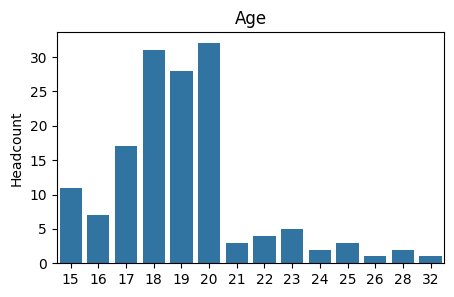

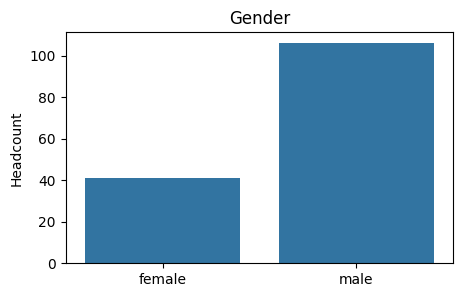

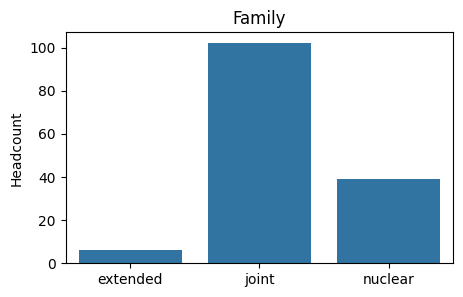

In [25]:
# Generate a bar chat of 'Age'
df_age = df.groupby('What is your age?').size().reset_index(name = 'Headcount')
df_age.rename(columns={'What is your age?':'Age'},inplace=True)
plt.figure(figsize=(5,3))
plt.title('Age')
sns.barplot(data = df_age, x = 'Age', y = 'Headcount')
plt.xlabel("")

#Generate a bar chat of 'Gender'
df_gender = df.groupby('Gender').size().reset_index(name = 'Headcount')
plt.figure(figsize=(5,3))
plt.title('Gender')
sns.barplot(data=df_gender, x = 'Gender', y = 'Headcount')
plt.xlabel("")

#Generate a bar chat of 'Family'
df_family = df.groupby('Type of Family').size().reset_index(name = 'Headcount')
df_family.rename(columns={'Type of Family': 'Family'}, inplace=True)
plt.figure(figsize=(5,3))
plt.title('Family')
sns.barplot(data=df_family, x = 'Family', y = 'Headcount')
plt.xlabel("")

3. Let´s analyze some aspects that related to video game.

In [26]:
df_game = df.groupby('What type of video games do you typically play?').size().reset_index(name='Count')
df_game.rename(columns={'What type of video games do you typically play?':'Type of Games'},inplace=True)
df_game

,Type of Games,Count
0,Cooking,1
1,Free fire,1
2,GTA openworld,1
3,"I play many :fps,fighting,action and sports",1
4,"Many like 1st,4th,5,6 options",1
5,No,1
6,Pubg,1
7,Racing,1
8,Story driven action games (Telltale's The Walk...,1
9,Temple run,1


We can see that the data here is quite poluted and it is difficult to organize or recatogorize the answers as we don't have the original survey and a video game can fit in various category, e.g. GTA can fit in violent, action, fighting etc.. 

Thus, let´s analyze the line items that related to "Violent Game"



<Axes: xlabel='Violent Game Time', ylabel='Headcount'>

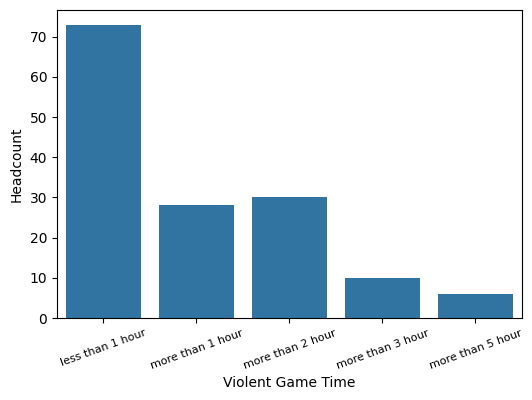

In [27]:
df_game_time = df.groupby('How much time do you play "violent" video games specifically?').size().reset_index(name='Headcount')
df_game_time.rename(columns={'How much time do you play "violent" video games specifically?':'Violent Game Time'},inplace = True)
plt.figure(figsize=(6,4))
plt.xticks(fontsize = 8, rotation=20)
sns.barplot(data=df_game_time, x = 'Violent Game Time', y = 'Headcount')

4. According to the instruction, columns 11 till 40 can be transform into Buss-Perry Aggression Scale.
- 'Strongly disagree': 1,
- 'Disagree': 2,
- 'Neither agree nor disagree': 3,
- 'Agree': 4,
- 'Strongly agree': 5\
Minimum total can possibly be 1 x 29 = 29 (least aggressive) Maximum total can possibly be 5 x 29 = 145 (most aggressive)

So let't transfrom the answers into these scale.

In [28]:
# Check whether there is any value that is not one of these 5 convertible value.

check_unique_columns = df.columns[11:41]
check_unique = pd.unique(df[check_unique_columns].values.ravel())
check_unique

array(['agree', 'Disagree', 'Neither agree nor disagree',
       'Strongly disagree', 'Strongly agree', 'Agree', nan,
       'strongly disagree', 'disagree', 'niether disagree nor agree',
       'strongly agree'], dtype=object)

We can see that except the 'Na' value we already discussed above, there is no another value outside of these 5 convertible value.\
Thus, we can convert all the text value into numertic one. But first, we need to change the data type from Object to String.

In [29]:
df_scale = df
change_columns = df_scale.iloc[:, 11:41].columns

# Change data type from object to string
df_scale = df_scale.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

# Apply lowercase transformation to the specified columns
df_scale[change_columns] = df_scale[change_columns].map(lambda x: x.lower() if isinstance(x, str) else x)

df_scale[change_columns] = df_scale[change_columns].replace({
    'strongly disagree': 1,
    'disagree': 2,
    'neither agree nor disagree': 3,
    'niether disagree nor agree': 3,
    'agree': 4,
    'strongly agree': 5,
})

df_scale[change_columns] = df_scale[change_columns].fillna(0) #replace blank value with 0

# Verify whether all the line items are replaced with number
check_unique = pd.unique(df_scale[change_columns].values.ravel())
check_unique

C:\Users\vielu\AppData\Local\Temp\ipykernel_4492\2979157857.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scale[change_columns] = df_scale[change_columns].replace({
C:\Users\vielu\AppData\Local\Temp\ipykernel_4492\2979157857.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scale[change_columns] = df_scale[change_columns].fillna(0) #replace blank value with 0


array([4, 2, 3, 1, 5, 0], dtype=int64)

Now we need to create a 'Buss-Perry Aggression Scale' column in order to evaluate the agreession level of participants.

In [30]:
df_scale['Buss-Perry Aggression Scale'] = df_scale.iloc[:,11:41].sum(axis=1)
df_scale

,Timestamp,What is your age?,Gender,Class,City/ Residencial status,Type of Family,What type of video games do you typically play?,Name the video game you usually play,How many hours do you play Video Games in a day?,"How much time do you play ""violent"" video games specifically?",...,"I know that some so called ""friends"" talk about me behind my back",My friends say that I am a bit argumentative,Sometimes I lose temper for no good reason,I get into fights a little more than a normal person,sometimes I can not control the feeling to hit another person,I sometimes get too much jealous from people,I dont know why sometimes I feel bitter about things,"Have you ever been involved in delinquent behaviour? like stealing, breaking things of others",Do you believe that playing violent video games can lead to aggressive behavior in real life?,Buss-Perry Aggression Scale
0,2023-07-11 22:16:49,20,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,4,4,1,2,0,0,0,no,yes,67
1,2023-07-11 23:01:27,18,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,4,5,4,4,4,3,2,yes,yes,115
2,2023-07-11 23:11:33,16,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,...,3,3,3,2,1,1,2,yes,yes,79
3,2023-07-11 23:12:33,19,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,...,4,2,2,2,2,1,2,no,yes,79
4,2023-07-11 23:14:42,19,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,...,4,3,2,2,3,3,4,yes,yes,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2023-07-17 01:14:02,18,female,Bba,Lahore,joint,action,Pubg,less than 1 hour,less than 1 hour,...,4,2,5,3,3,3,3,yes,yes,99
143,2023-07-17 01:36:27,18,male,BS Commerce,Lahore,joint,sports,Fifa,more than 1 hour,less than 1 hour,...,3,3,3,3,3,3,3,no,no,86
144,2023-07-17 02:28:33,18,female,12th,Lahorw,nuclear,Violent,Counter Strike,more than 1 hour,more than 1 hour,...,4,4,2,2,2,2,4,no,yes,89
145,2023-07-17 02:35:12,15,male,9th,Pakpattan,nuclear,action,Call of duty,more than 3 hour,less than 1 hour,...,4,2,1,3,1,1,1,no,no,69


Is people that spend more time playing violent game have a higher Aggression score?

In [31]:
df_time_agg = df_scale.groupby('How much time do you play "violent" video games specifically?')['Buss-Perry Aggression Scale'].mean().reset_index(name='Average BPAQ')

df_time_agg = df_time_agg.sort_values(by='Average BPAQ',ascending=True)
df_time_agg


,"How much time do you play ""violent"" video games specifically?",Average BPAQ
1,more than 1 hour,82.857143
0,less than 1 hour,84.000000
2,more than 2 hour,87.666667
3,more than 3 hour,94.700000
4,more than 5 hour,104.500000


Interestingly, we observe that participants who play more than 1 hour of violent games have lower average BPAQ scores than those who play less than 1 hour of violent games.
Let's perform a linear regression analysis to determine whether there is a relationship between these two elements.

In [35]:
print(df_scale['How much time do you play "violent" video games specifically?'].unique())

<StringArray>
['more than 2 hour', 'more than 1 hour', 'less than 1 hour',
 'more than 3 hour', 'more than 5 hour']
Length: 5, dtype: string


In [39]:
# Change the value in 'hour of game play' to numeric for future analysis

df_scale['How much time do you play "violent" video games specifically?'] = (
    df_scale['How much time do you play "violent" video games specifically?']
    .astype('object')  # Convert to object type
    .replace({
        'less than 1 hour': 1,
        'more than 1 hour': 2,
        'more than 2 hour': 3,
        'more than 3 hour': 4,
        'more than 5 hour': 6,
    })
    .astype(float)  # Optionally convert to numeric after replacement
)


C:\Users\vielu\AppData\Local\Temp\ipykernel_4492\4264424200.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


0.25784659446874975 0.0016158655121245456


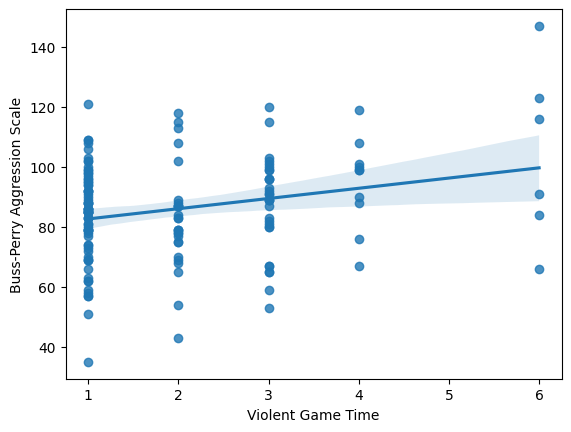

In [72]:
df_scale.rename(columns={'How much time do you play "violent" video games specifically?':'Violent Game Time'},inplace = True)
sns.regplot(data=df_scale, x='Violent Game Time', y = 'Buss-Perry Aggression Scale')

x = df_scale['Violent Game Time']
y = df_scale['Buss-Perry Aggression Scale']
correlation_coefficient,p_value = pearsonr(x,y)
print(correlation_coefficient, p_value)

As the p-value is 0.0016 < 0.05, we can say that there is evidence to reject the null hypothesis and conclude that there is a correlation or relationship between the two variables.
However, the correlation coefficient is 0.258 indicates a weak positive linear relationship between the two variables, and the formula can't well represent or predict the tendency, there maybe another elements that can contribute to the BPAQ.